In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('/Users/shemontod/Desktop/Projects/Fraud_Detection/Fraud.csv')

In [5]:
df.shape

(6362620, 11)

In [6]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# statistical description of the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
# total occurence of fraud
df.isFraud.sum()

8213

In [30]:
fraud_cases = df[df['isFraud'] == 1]
normal_cases = df[df['isFraud'] == 0]

print("Number of fraud occurence: ", len(fraud_cases))
print("Number of normal occurence: ", len(normal_cases))

Number of fraud occurence:  8213
Number of normal occurence:  6354407


In [15]:
## payment types
np.unique(df['type'])

array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype=object)

## Checking balanced or imbalanced

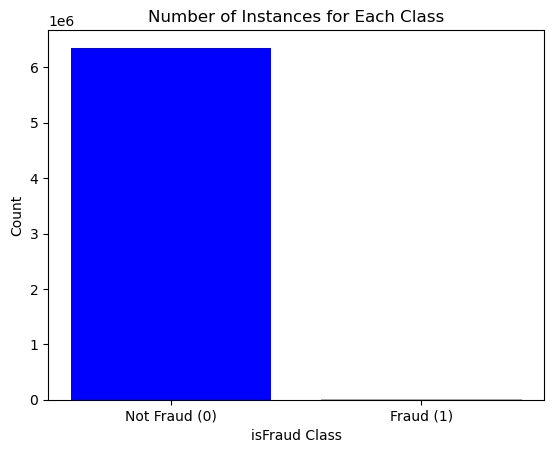

In [16]:
import matplotlib.pyplot as plt

# Assuming 'isFraud' is a column in the DataFrame 'df'
fraud_counts = df['isFraud'].value_counts()

# Create a bar plot
plt.bar(fraud_counts.index, fraud_counts.values, color=['blue', 'orange'])

# Adding labels and title
plt.title('Number of Instances for Each Class')
plt.xlabel('isFraud Class')
plt.ylabel('Count')
plt.xticks(fraud_counts.index, ['Not Fraud (0)', 'Fraud (1)'])

plt.show()


## Distribution of Fraud accross payment types

In [28]:
fraudulent_types = df[df['isFraud'] == 1].groupby('type').size()
fraudulent_types

type
CASH_OUT    4116
TRANSFER    4097
dtype: int64

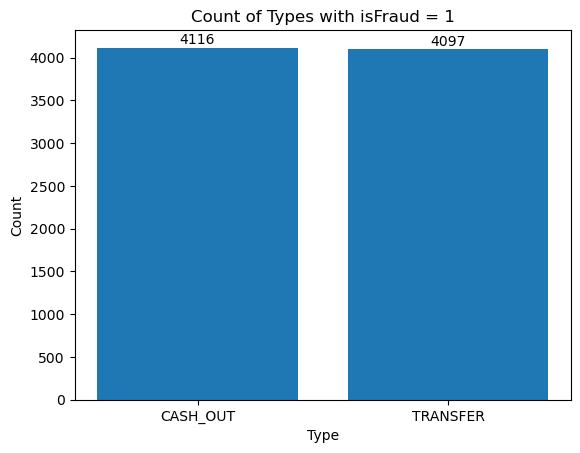

In [18]:
bars = plt.bar(fraudulent_types.index, fraudulent_types.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Types with isFraud = 1')

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom')

plt.show()

### That is, fraud has occured with only payment type of cash_out and transfer

## Count accross various payment type

<BarContainer object of 5 artists>

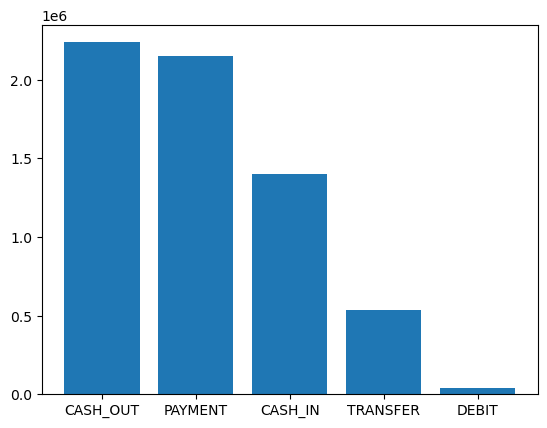

In [19]:
payment_type_counts = df['type'].value_counts()
plt.bar(payment_type_counts.index, payment_type_counts.values)

## Checking validity of  'isFlaggedFraud' column against "isFraud" column

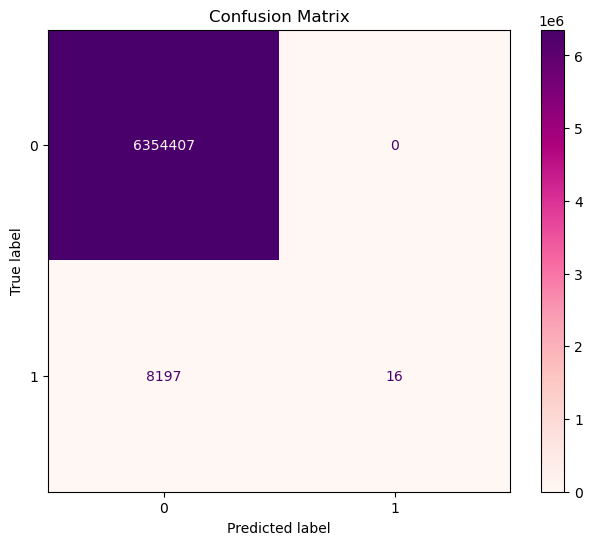

In [20]:
confusion_matrix = metrics.confusion_matrix(df["isFraud"], df["isFlaggedFraud"])
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

# Plot the confusion matrix with class labels as legend
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(cmap='RdPu', values_format='d', ax=ax)

plt.title('Confusion Matrix')

plt.show()

### as seen for 'isFlaggedFraud' = 1 there has been numerous misclassifications

In [22]:
# statistical description of the "isFraud" column

df[df["isFraud"] == 1]["amount"].describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

## Max and Min of 'Amount' for Fraud cases

In [34]:
max_fraud_amount = fraud_cases.amount.max()
min_fraud_amount = fraud_cases.amount.min()

print("Max amount for fraud case: ", max_fraud_amount)
print("Min amount for fraud case: ", min_fraud_amount)

Max amount for fraud case:  10000000.0
Min amount for fraud case:  0.0


### fraud also occurs in transactions worth of amount = 0.
### Let's dig into details of such instances

In [42]:
zero_fraud = df[(df['amount'] == 0) & (df['isFraud'] == 1)]
print("Total such instances ",len(zero_fraud))
zero_fraud

Total such instances  16


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


### Now let's get the max and min of 'Amount' for fraud cases accros payment types

In [46]:
max_cashout_fraud_amount = df[(df['amount'] == 0) & (df['isFraud'] == 1) & (df['type'] == 'CASH_OUT')]
print(len(max_cashout_fraud_amount))

max_transfer_fraud_amount = df[(df['amount'] == 0) & (df['isFraud'] == 1) & (df['type'] == 'TRANSFER')]
print(len(max_transfer_fraud_amount))

16
0


### As seen in the above cell fraud occurs in transactions worth of amount = 0 for transaction "type = CASH_OUT" only

In [49]:
dict={}
for i in fraud_cases["amount"]:
    if i  not in dict:
        dict[i]=1
    else:
        dict[i]=dict[i]+1

In [50]:
dict

{181.0: 2,
 2806.0: 2,
 20128.0: 2,
 416001.33: 1,
 1277212.77: 2,
 35063.63: 2,
 25071.46: 2,
 132842.64: 1,
 235238.66: 2,
 1096187.24: 2,
 963532.14: 2,
 14949.84: 2,
 18627.02: 2,
 10539.37: 2,
 22877.0: 2,
 10000000.0: 287,
 2930418.44: 2,
 169941.73: 2,
 13707.11: 2,
 86070.17: 2,
 120074.73: 2,
 60726.57: 2,
 10119.47: 2,
 33332.86: 2,
 25975.86: 2,
 26768.5: 2,
 30521.02: 2,
 216422.0: 2,
 17320.91: 2,
 17246.0: 2,
 10565.0: 2,
 10224.0: 2,
 85354.69: 2,
 13704.0: 2,
 262434.54: 2,
 21729.0: 2,
 5460002.91: 2,
 164.0: 2,
 21571.0: 2,
 441445.58: 2,
 181728.11: 1,
 222.0: 2,
 1996.17: 2,
 1078013.76: 1,
 89631.24: 2,
 29707.86: 2,
 43092.0: 2,
 556218.01: 2,
 11308.0: 2,
 350705.74: 2,
 2539898.07: 2,
 361559.69: 2,
 1154353.99: 2,
 21922.0: 2,
 994453.2: 1,
 1055.0: 2,
 244068.01: 2,
 59835.0: 2,
 277970.88: 1,
 93810.76: 2,
 503405.88: 2,
 2662734.59: 2,
 9217.19: 2,
 2100.0: 2,
 1933920.8: 1,
 313418.28: 2,
 12461.0: 2,
 19472.0: 2,
 3964129.99: 2,
 1041647.06: 2,
 2066467.64

In [56]:
max_key = None
max_value = None

for key, value in dict.items():
    if max_value is None or value > max_value:
        max_key = key
        max_value = value


print("Amount corresponding to Maximum number of Transaction :", max_key)
print("Count of Maximum number of Transction to a particular Amount", max_value)

Amount corresponding to Maximum number of Transaction : 10000000.0
Count of Maximum number of Transction to a particular Amount 287


### That is, most number of frauds has occured on a amount of "10000000"

# Feature Selection

## Information gain

###  It measures the information/dependency between a particular variable and the target. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. Features with higher information gain are considered more important.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
importances = mutual_info_classif(X,y)
feature_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feature_importances.plot(kind='barh')
plt.show()

## Correlation Matrix
### Variables should be correlated with the target but uncorrelated among themselves.

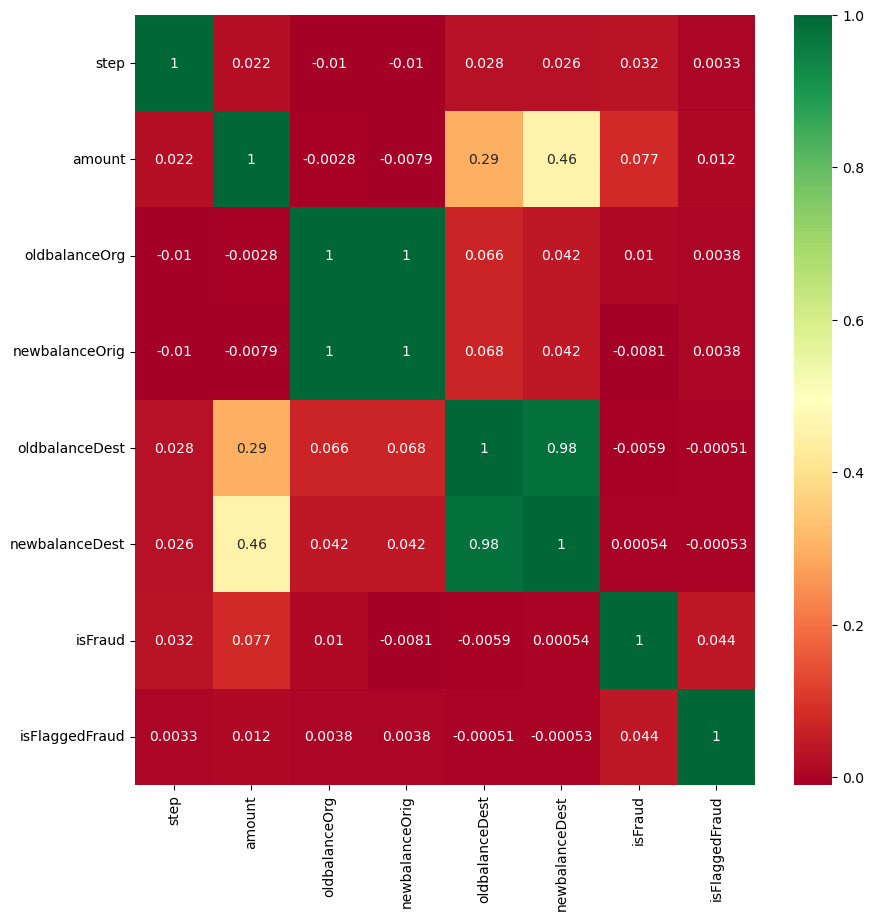

In [60]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")